<a href="https://colab.research.google.com/github/Rudrajit12/ML_Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [45]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# importing the dataset
from sklearn.datasets import load_boston
boston_data = load_boston()
print("Type of boston dataset :", type(boston_data))

Type of boston dataset : <class 'sklearn.utils.Bunch'>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [47]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [48]:
# description of the dataset
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [49]:
# loading the dataset into a dataframe
boston_df = pd.DataFrame(boston_data['data'])
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
# adding the column names
boston_df.columns = boston_data['feature_names']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [51]:
# adding the dependent variable
boston_df['MEDV'] = boston_data['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We already know that there are no missing values, hence we can directly jump into the distributions.

In [52]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


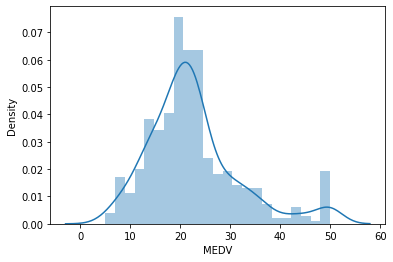

In [53]:
# distribution of dependent variable
sns.distplot(boston_df['MEDV'])

### **Let's check how the data is correlated to each other**

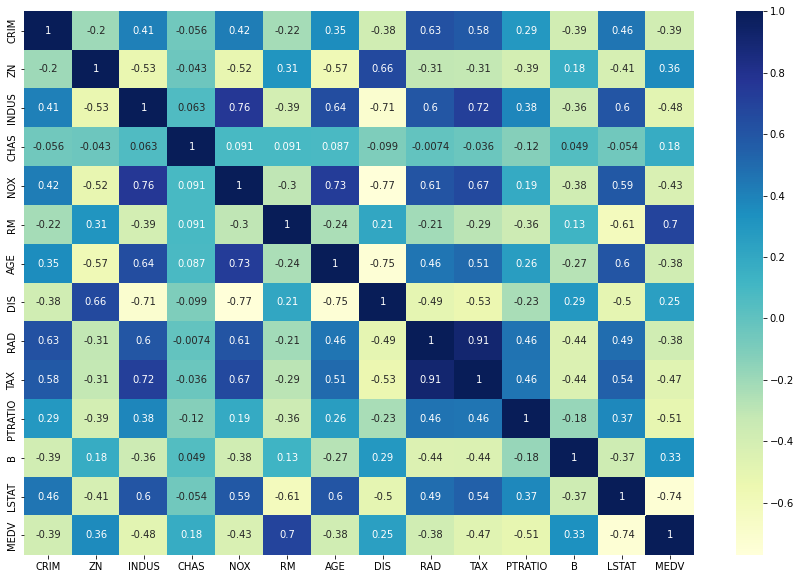

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(boston_df.corr(),annot= True, cmap='YlGnBu')

**From the above heatmap we can figure out that**

* MEDV is positively correlated to RM
* MEDV is negatively correlated to LSTAT

**For the independent variables:**

* TAX and RAD have the highest positive correlation
* NOX-DIS have the highest negative correlation

### **1. Check for assumptions:**

Assumption 1: Relation between the dependent and independent variables should be linear.

Assumption 2: Mean of residuals must be close to zero as much as possible.

Assumption 3: There should be homoscedasticity or equal variance.

Assumption 4: There should not be multicollinearity between independent variables.

* **Check if the dependent and independent variable is linearly related**

Text(0, 0.5, 'MEDV')

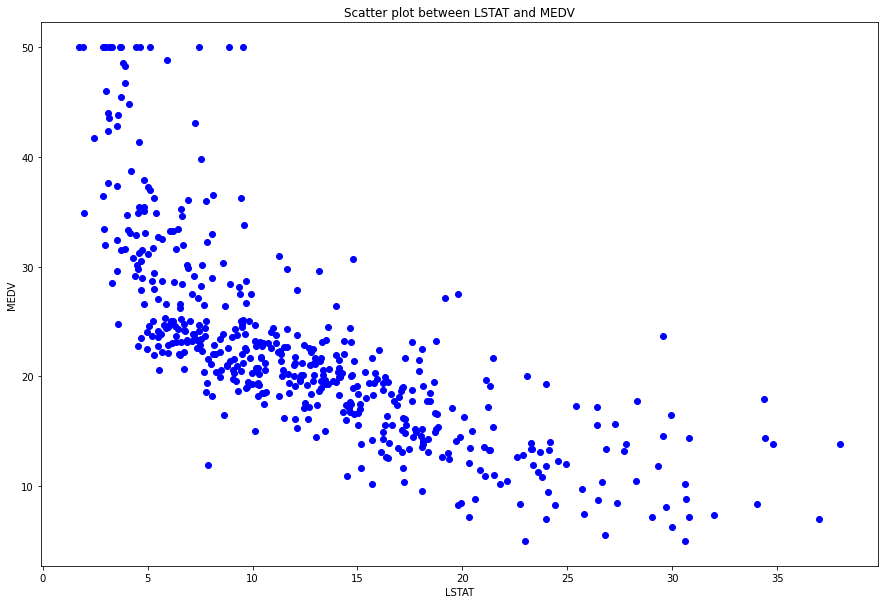

In [55]:
# plot between LSTAT and MEDV columns
plt.figure(figsize=(15,10))
plt.scatter(boston_df['LSTAT'], boston_df['MEDV'], color='blue')
plt.title('Scatter plot between LSTAT and MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

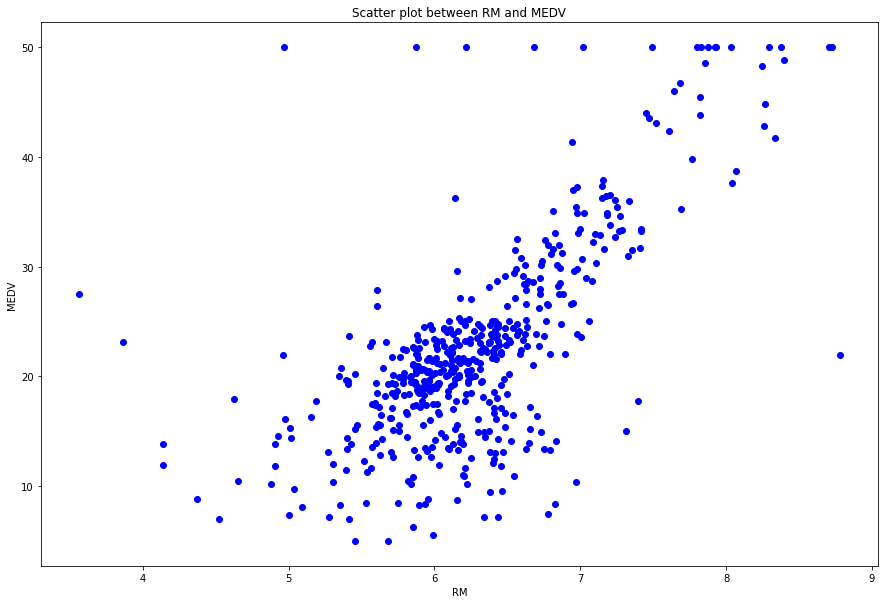

In [56]:
# plot between RM and MEDV columns
plt.figure(figsize=(15,10))
plt.scatter(boston_df['RM'], boston_df['MEDV'], color='blue')
plt.title('Scatter plot between RM and MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

**Both the plots suggest that they are linearly related to each other.**

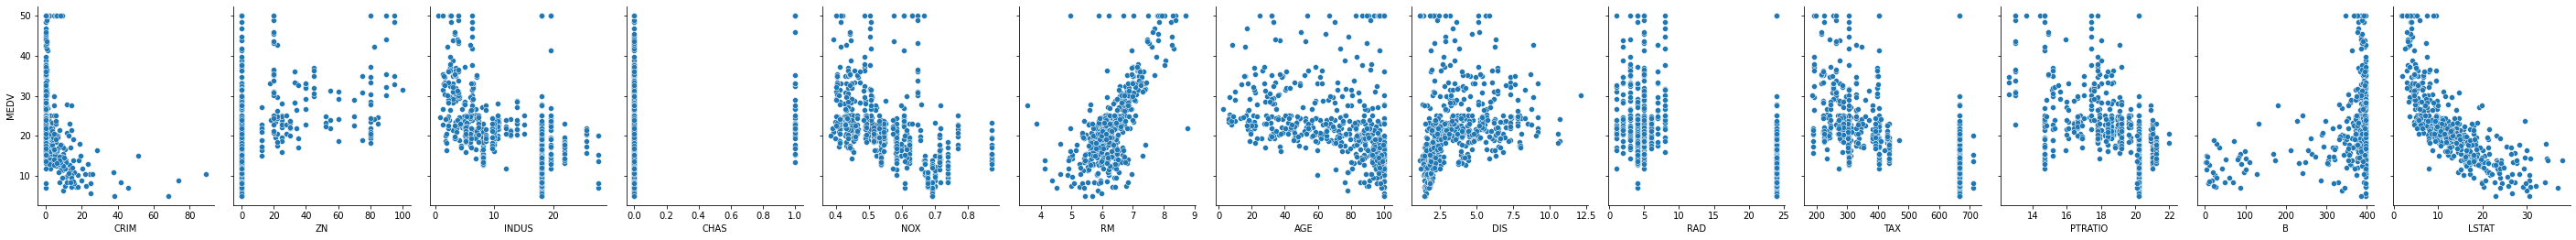

In [57]:
# check the relationship of all columns
plot = sns.pairplot(boston_df, x_vars= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], y_vars=['MEDV'])
plot.fig.set_figheight(4)
plot.fig.set_figwidth(40)

**Hence to conclude, LSTAT and RM are the best possible independent variables to make any future predictions about our dependent variable MEDV.**

All the independent variables are not linearly related to the dependent variable, hence we don't expect the model to be very accurate enough.

### **Preparing to Model the Data**

In [58]:
# considering only the two independent variables LSTAT and RM
dependent_variable = 'MEDV'
independent_variables = ['LSTAT','RM']
independent_variables

# Create the data of independent variables
X = boston_df[independent_variables].values

# Create the dependent variable data
Y = boston_df[dependent_variable].values

# Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# transforming the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [59]:
# Predicting the train set results
Y_train_pred = regressor.predict(X_train)

In [60]:
# Predicting the test set results
Y_test_pred = regressor.predict(X_test)

In [61]:
# residual = actual_value - predicted_value
residuals_train = Y_train - Y_train_pred
residuals_test = Y_test - Y_test_pred

round((np.mean(residuals_train)))

0

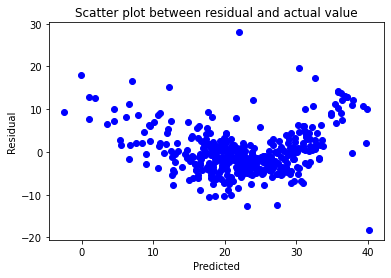

In [62]:
# Plotting scatter plot between residual and fitted values
plt.scatter(Y_train_pred, residuals_train,c='blue')
plt.title('Scatter plot between residual and actual value')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

In [63]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  print('R2 score is {}'.format(r2_score(actual, predicted)))
  print('Adjusted R2 score is {}'.format(1 - (((len(actual) - 1)/(len(actual) - len(independent_variables) - 1)) * (1 - r2_score(actual, predicted)))))

In [64]:
# training dataset metrics
print_metrics(Y_train, Y_train_pred)

MSE is 28.790276482053436
RMSE is 5.3656571342244215
MAE is 3.9112606375421555
MAPE is 20.59302411747418
R2 score is 0.6618625964841895
Adjusted R2 score is 0.6601761256437118


In [65]:
# testing dataset metrics
print_metrics(Y_test, Y_test_pred)

MSE is 37.38310563877995
RMSE is 6.114172522817781
MAE is 4.142444656238563
MAPE is 21.654045363343553
R2 score is 0.5409084827186418
Adjusted R2 score is 0.5316339066119478


### **Now, let us consider all the independent variables and model our data:**

In [66]:
# Create a list of independent variables
independent_variables = list(set(boston_df.columns.tolist()) - {dependent_variable})

In [67]:
independent_variables

['NOX',
 'B',
 'CRIM',
 'CHAS',
 'ZN',
 'TAX',
 'RAD',
 'AGE',
 'RM',
 'PTRATIO',
 'INDUS',
 'DIS',
 'LSTAT']

In [68]:
# Create the data of independent variables
X = boston_df[independent_variables].values

# Create the dependent variable data
Y = boston_df[dependent_variable].values

In [69]:
# Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [70]:
X_train

array([[5.0700e-01, 3.9170e+02, 3.5809e-01, ..., 6.2000e+00, 2.8617e+00,
        9.7100e+00],
       [4.1300e-01, 3.7694e+02, 1.5876e-01, ..., 1.0810e+01, 5.2873e+00,
        9.8800e+00],
       [4.2800e-01, 3.9125e+02, 1.1329e-01, ..., 4.9300e+00, 6.3361e+00,
        1.1380e+01],
       ...,
       [5.4700e-01, 3.9451e+02, 1.5098e-01, ..., 1.0010e+01, 2.7474e+00,
        1.0300e+01],
       [4.4800e-01, 3.9274e+02, 2.2927e-01, ..., 6.9100e+00, 5.6894e+00,
        1.8800e+01],
       [5.1000e-01, 3.9690e+02, 1.3914e-01, ..., 4.0500e+00, 2.5961e+00,
        1.4690e+01]])

In [71]:
X_test

array([[4.6000e-01, 3.7521e+02, 6.7240e-02, ..., 3.2400e+00, 5.2146e+00,
        7.3400e+00],
       [6.3100e-01, 3.6615e+02, 9.2323e+00, ..., 1.8100e+01, 1.1691e+00,
        9.5300e+00],
       [5.5000e-01, 3.9374e+02, 1.1425e-01, ..., 1.3890e+01, 3.3633e+00,
        1.0500e+01],
       ...,
       [4.5300e-01, 3.9511e+02, 1.4932e-01, ..., 5.1300e+00, 7.2254e+00,
        1.3150e+01],
       [4.8900e-01, 3.8581e+02, 1.4052e-01, ..., 1.0590e+01, 3.9454e+00,
        9.3800e+00],
       [5.2000e-01, 3.9524e+02, 1.2802e-01, ..., 8.5600e+00, 2.4329e+00,
        1.2270e+01]])

In [72]:
# transforming the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Fitting Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [74]:
# Predicting the train set results
Y_train_pred = regressor.predict(X_train)

In [75]:
# Predicting the test set results
Y_test_pred = regressor.predict(X_test)

* **Check for mean of residual assumption**

In [76]:
# residual = actual_value - predicted_value
residuals_train = Y_train - Y_train_pred
residuals_test = Y_test - Y_test_pred

round((np.mean(residuals_train)))

0

* **Check for homoscedasticity**

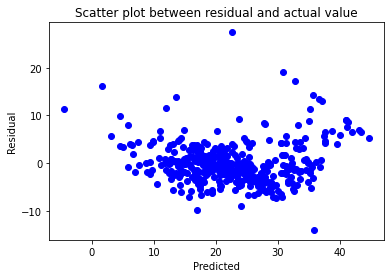

In [77]:
# Plotting scatter plot between residual and fitted values
plt.scatter(Y_train_pred, residuals_train,c='blue')
plt.title('Scatter plot between residual and actual value')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

* **Check for multicollinearity**

In [78]:
boston_df[independent_variables].corr()

,NOX,B,CRIM,CHAS,ZN,TAX,RAD,AGE,RM,PTRATIO,INDUS,DIS,LSTAT
NOX,1.000000,-0.380051,0.420972,0.091203,-0.516604,0.668023,0.611441,0.731470,-0.302188,0.188933,0.763651,-0.769230,0.590879
B,-0.380051,1.000000,-0.385064,0.048788,0.175520,-0.441808,-0.444413,-0.273534,0.128069,-0.177383,-0.356977,0.291512,-0.366087
CRIM,0.420972,-0.385064,1.000000,-0.055892,-0.200469,0.582764,0.625505,0.352734,-0.219247,0.289946,0.406583,-0.379670,0.455621
CHAS,0.091203,0.048788,-0.055892,1.000000,-0.042697,-0.035587,-0.007368,0.086518,0.091251,-0.121515,0.062938,-0.099176,-0.053929
ZN,-0.516604,0.175520,-0.200469,-0.042697,1.000000,-0.314563,-0.311948,-0.569537,0.311991,-0.391679,-0.533828,0.664408,-0.412995
TAX,0.668023,-0.441808,0.582764,-0.035587,-0.314563,1.000000,0.910228,0.506456,-0.292048,0.460853,0.720760,-0.534432,0.543993
RAD,0.611441,-0.444413,0.625505,-0.007368,-0.311948,0.910228,1.000000,0.456022,-0.209847,0.464741,0.595129,-0.494588,0.488676
AGE,0.731470,-0.273534,0.352734,0.086518,-0.569537,0.506456,0.456022,1.000000,-0.240265,0.261515,0.644779,-0.747881,0.602339
RM,-0.302188,0.128069,-0.219247,0.091251,0.311991,-0.292048,-0.209847,-0.240265,1.000000,-0.355501,-0.391676,0.205246,-0.613808
PTRATIO,0.188933,-0.177383,0.289946,-0.121515,-0.391679,0.460853,0.464741,0.261515,-0.355501,1.000000,0.383248,-0.232471,0.374044


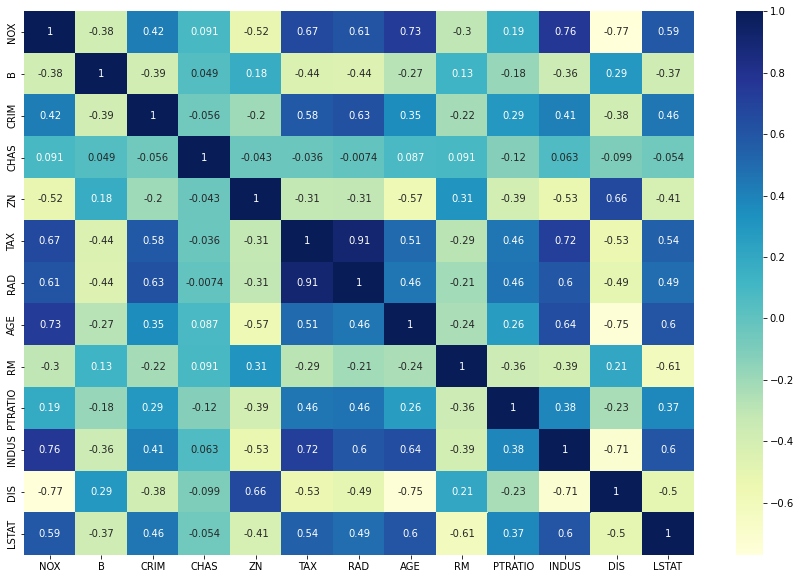

In [79]:
# plotting the heatmap to understand correlation
plt.figure(figsize=(15,10))
sns.heatmap(boston_df[independent_variables].corr(), annot=True, cmap='YlGnBu')

**There are multiple independent variables which are correlated with each other.**

### **2. Computing evaluation metrics**

In [80]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  print('R2 score is {}'.format(r2_score(actual, predicted)))
  print('Adjusted R2 score is {}'.format(1 - (((len(actual) - 1)/(len(actual) - len(independent_variables) - 1)) * (1 - r2_score(actual, predicted)))))

In [81]:
# training dataset metrics
print_metrics(Y_train, Y_train_pred)

MSE is 19.326470203585725
RMSE is 4.396188144698282
MAE is 3.103156396579434
MAPE is 15.372888461066417
R2 score is 0.7730135569264234
Adjusted R2 score is 0.7654473421573041


In [82]:
# testing dataset metrics
print_metrics(Y_test, Y_test_pred)

MSE is 33.44897999767657
RMSE is 5.783509315085138
MAE is 3.8429092204444983
MAPE is 18.356285293906456
R2 score is 0.5892223849182503
Adjusted R2 score is 0.5285393281448101
